In [1]:
from pathlib import Path

if Path.cwd().stem == "notebooks":
    %cd ..
    %load_ext autoreload
    %autoreload 2

/Users/visser/drive/PhD/Code/pain-measurement


In [2]:
import logging

from src.experiments.calibration.estimator import BayesianEstimatorVAS
from src.log_config import configure_logging
from src.visualization.plot_calibration import plot_trials

configure_logging(stream_level=logging.DEBUG, ignore_libs=["matplotlib", "Comm"])

# Visualization of Calibration

In [3]:
# Preexposure
preexposure_temperatures = [38, 39, 40]
correction_after_preexposure = 2

# VAS 70 estimation
trials_vas70 = 7
temp_start_vas70 = 46
temp_std_vas70 = 2
likelihood_std_vas70 = 0.8
reduction_factor = 0.85

# VAS 0 estimation
trials_vas0 = 5
temp_start_vas0 = None  # based on VAS 70 estimation
temp_start_vas0_offset = 3
temp_std_vas0 = 1
likelihood_std_vas0 = 0.9

In [4]:
response = input(
    f"Were any of the preexposure stimuli ({str(preexposure_temperatures)} °C) painful? (y/n) "
)
if response == "y":
    temp_start_vas70 -= correction_after_preexposure
    logging.info(
        f"Calibration preexposure was painful. Starting temperature for VAS 70 estimation: {temp_start_vas70} °C."
    )
else:
    temp_start_vas70 = temp_start_vas70
    logging.info(
        f"Calibration preexposure was not painful. Starting temperature for VAS 70 estimation: {temp_start_vas70} °C."
    )

20:40:43 | INFO    | root | Calibration preexposure was not painful. Starting temperature for VAS 70 estimation: 46 °C.


In [5]:
# Get estimate for VAS 70
estimator_vas70 = BayesianEstimatorVAS(
    vas_value=70,
    trials=trials_vas70,
    temp_start=temp_start_vas70,
    temp_std=temp_std_vas70,
    likelihood_std=likelihood_std_vas70,
    reduction_factor=reduction_factor,
)
for trial in range(estimator_vas70.trials):
    response = input(
        f"Is this stimulus ({estimator_vas70.current_temp} °C) at least a 7 out of 10? (y/n) "
    )
    estimator_vas70.conduct_trial(response, trial=trial)
plot_trials(estimator_vas70, interactive=True)

20:40:47 | INFO    | estimator | Calibration trial (1/7): 46 °C was under VAS 70.
20:40:48 | INFO    | estimator | Calibration trial (2/7): 47.0 °C was under VAS 70.
20:40:50 | INFO    | estimator | Calibration trial (3/7): 47.7 °C was over VAS 70.
20:40:50 | INFO    | estimator | Calibration trial (4/7): 47.3 °C was under VAS 70.
20:40:53 | INFO    | estimator | Calibration trial (5/7): 47.6 °C was over VAS 70.
20:40:53 | INFO    | estimator | Calibration trial (6/7): 47.4 °C was under VAS 70.
20:40:54 | INFO    | estimator | Calibration trial (7/7): 47.6 °C was over VAS 70.
20:40:54 | INFO    | estimator | Calibration estimate for VAS 70: 47.4 °C.
20:40:54 | DEBUG   | estimator | Calibration steps for VAS 70 were (°C): [ 1.   0.7 -0.4  0.3 -0.2  0.2 -0.2].


In [11]:
# Get estimate for VAS 0
estimator_vas0 = BayesianEstimatorVAS(
    vas_value=0,
    trials=trials_vas0,
    temp_start=estimator_vas70.get_estimate() - temp_start_vas0_offset,
    temp_std=temp_std_vas0,
    likelihood_std=likelihood_std_vas0,
    reduction_factor=reduction_factor,
)
for trial in range(estimator_vas0.trials):
    response = input(
        f"Is this stimulus ({estimator_vas0.current_temp} °C) painful? (y/n) "
    )
    estimator_vas0.conduct_trial(response, trial=trial)
plot_trials(estimator_vas0, interactive=True)

20:43:15 | INFO    | estimator | Calibration trial (1/5): 44.4 °C was under VAS 0.
20:43:15 | INFO    | estimator | Calibration trial (2/5): 45.0 °C was under VAS 0.
20:43:15 | INFO    | estimator | Calibration trial (3/5): 45.4 °C was under VAS 0.
20:43:16 | INFO    | estimator | Calibration trial (4/5): 45.8 °C was over VAS 0.
20:43:17 | INFO    | estimator | Calibration trial (5/5): 45.5 °C was over VAS 0.
20:43:17 | INFO    | estimator | Calibration estimate for VAS 0: 45.3 °C.
20:43:17 | DEBUG   | estimator | Calibration steps for VAS 0 were (°C): [ 0.6  0.4  0.4 -0.3 -0.2].


## Non-interactive plots

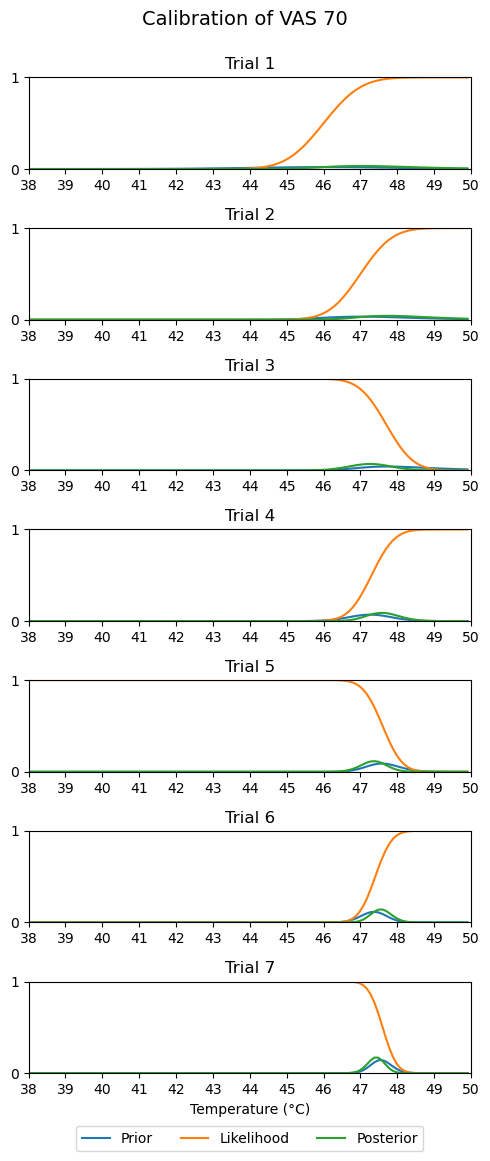

In [7]:
plot_trials(estimator_vas70, interactive=False)

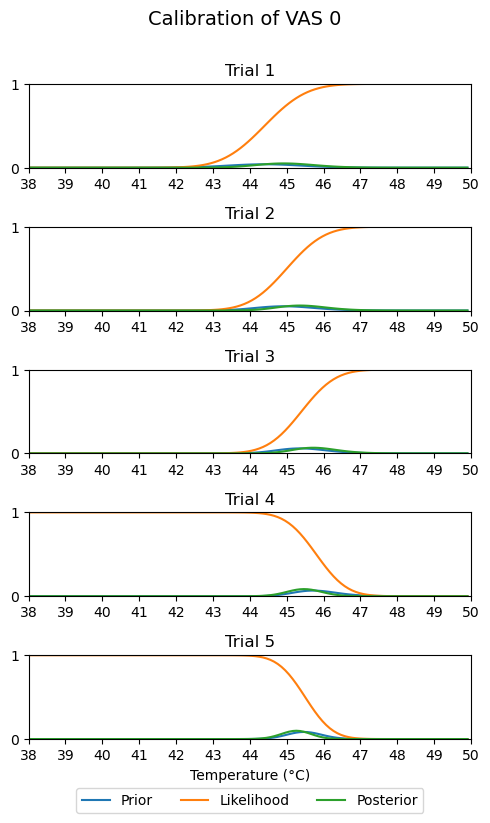

In [8]:
plot_trials(estimator_vas0, interactive=False)